In [1]:
from interest.sentiment_analyser.doc2vec import SentimentAnalyser
import pandas as pd
from pathlib import Path


In [2]:
import spacy.cli
spacy.cli.download("nl_core_news_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('nl_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# article_fp = Path("../data/AI-labeled/train_dataset.csv")
article_fp = Path("../data/merged/combined/combined_df.csv")



In [3]:
analyzer = SentimentAnalyser(negative_words_fp='../data/negative_words_gpt.txt', positive_words_fp='../data/positive_words_gpt.txt', articles_fp=article_fp, model_fp='../models/pretrained/Dutch_CoNLL17_corpus/model.bin')



Calculating word vectors...: 100%|████████████████████████████████| 3141/3141 [00:01<00:00, 2058.44article/s]


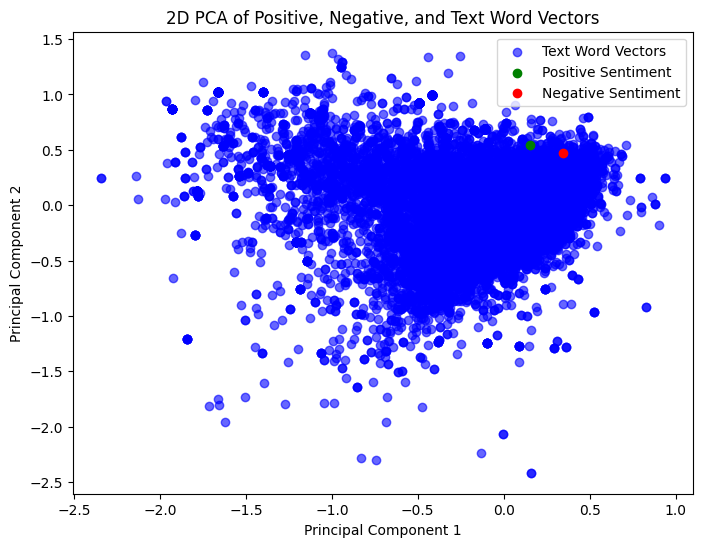

In [4]:
negative_sentiment_word_vector = analyzer.negative_words_to_word_vectors()
positive_sentiment_word_vector = analyzer.positive_words_to_word_vectors()
articles_word_vectors = analyzer.text_to_word_vectors()
analyzer.plot_word_vectors(positive_word_vector=positive_sentiment_word_vector, negative_word_vector=negative_sentiment_word_vector, articles_word_vectors=articles_word_vectors)


## Sentiments including neutral

Counts in modified_sentiment_labels:
Positive (1): 1102
Neutral (0): 946
Negative (-1): 1093
Counts in modified_article_sentiments:
Positive (1): 977
Neutral (0): 2098
Negative (-1): 66
Confusion Matrix:
[[461 633   8]
 [298 636  12]
 [218 829  46]]
Classification Report:
              precision    recall  f1-score   support

    positive       0.70      0.04      0.08      1093
     neutral       0.30      0.67      0.42       946
    negative       0.47      0.42      0.44      1102

    accuracy                           0.36      3141
   macro avg       0.49      0.38      0.31      3141
weighted avg       0.50      0.36      0.31      3141



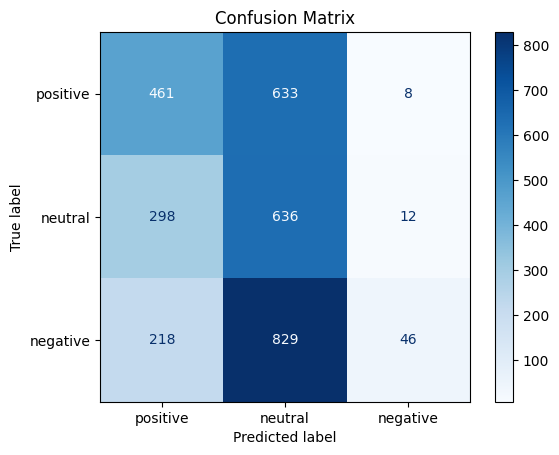

{'accuracy': 0.3638968481375358,
 'precision': 0.4993777243434527,
 'recall': 0.3638968481375358,
 'f1_score': 0.3090687136786263,
 'confusion_matrix': array([[461, 633,   8],
        [298, 636,  12],
        [218, 829,  46]])}

In [5]:
article_sentiments = analyzer.calculate_article_sentiment(articles_word_vectors=articles_word_vectors, negative_sentiment_word_vector=negative_sentiment_word_vector, positive_sentiment_word_vector=positive_sentiment_word_vector, neutral_threshold=0.05)
analyzer.evaluate_sentiment_predictions(analyzer.sentiment_labels, article_sentiments, sentiment_type='multi')


## Sentiments only positive and negative

Counts in modified_sentiment_labels:
Positive (1): 2048
Neutral (0): 0
Negative (-1): 1093
Counts in modified_article_sentiments:
Positive (1): 3075
Neutral (0): 0
Negative (-1): 66
Confusion Matrix:
[[2028   20]
 [1047   46]]
Classification Report:
              precision    recall  f1-score   support

    positive       0.70      0.04      0.08      1093
    negative       0.66      0.99      0.79      2048

    accuracy                           0.66      3141
   macro avg       0.68      0.52      0.44      3141
weighted avg       0.67      0.66      0.54      3141



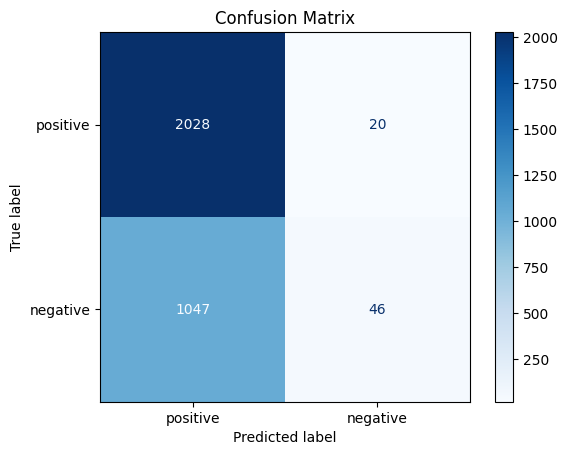

{'accuracy': 0.6602992677491245,
 'precision': 0.6725465948416539,
 'recall': 0.6602992677491245,
 'f1_score': 0.5438430221405504,
 'confusion_matrix': array([[2028,   20],
        [1047,   46]])}

In [6]:
article_sentiments = analyzer.calculate_article_sentiment(articles_word_vectors=articles_word_vectors, negative_sentiment_word_vector=negative_sentiment_word_vector, positive_sentiment_word_vector=positive_sentiment_word_vector, neutral_threshold=0.05)
analyzer.evaluate_sentiment_predictions(analyzer.sentiment_labels, article_sentiments, sentiment_type='binary')
